In [33]:
import pandas as pd
df = pd.read_csv("../car_prices.csv")

display(df)
print(df.columns)

,car_id,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Trim,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city
0,icwAaDOmX573WiRRnLFPT237,2812500,Petrol,Automatic,Toyota,Corolla,2004,Silver,Nigerian Used,251732.0,1800.0,Registered,Registered,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ByZ3NlPy2x0arAIyrKazClUS,5000000,Petrol,Automatic,Acura,MDX,2007,Green,Foreign Used,224589.0,3700.0,Imported,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
2,2zG6Mh3kwyoTvWoeKHkV1oFH,7592000,Petrol,Automatic,Acura,TL,2012,White,Foreign Used,111334.0,3500.0,Imported,Imported,Sedan,SH-AWD Automatic Tech Package,All Wheel,5.0,6.0,309.0,NaN
3,7APLHOPlI93qsYK0ST4D4wB2,9880000,Petrol,Automatic,Land Rover,Range Rover,2012,Gray,Nigerian Used,72682.0,4000.0,Registered,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
4,zIrIDPJLd46eRQf9JFacc0e,4160000,Petrol,Automatic,Ford,Edge,2013,Gray,Nigerian Used,92118.0,3500.0,Registered,Registered,SUV,NaN,NaN,NaN,NaN,NaN,Lagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,C4Ly76wwazrtbYRAWkTnv2Q5,1924000,Petrol,Automatic,Toyota,RAV4,2003,Red,Nigerian Used,282769.0,2000.0,Registered,Imported,SUV,Automatic,All Wheel,5.0,4.0,NaN,Plateau
3718,jPA7XlJJxdwpZStlurumw59q,1890000,Petrol,Automatic,Mercedes-Benz,M Class,2002,Silver,Nigerian Used,182544.0,3200.0,Registered,Registered,SUV,ML 320,All Wheel,5.0,6.0,215.0,NaN
3719,g5szhuHeXu2djH1Z2be22G7E,1155000,Petrol,Automatic,Toyota,Camry,2000,Black,Nigerian Used,234354.0,2200.0,Registered,Registered,Sedan,LE 4dr Sedan (2.2L 4cyl 4A),Front,5.0,4.0,136.0,RIVERS
3720,mdZMNQK7Zez0cSS67Q9Quhzr,1260000,Petrol,Automatic,Toyota,RAV4,2001,Black,Nigerian Used,345926.0,2000.0,Registered,Registered,SUV,NaN,NaN,NaN,NaN,NaN,NaN


Index(['car_id', 'price', 'fuel type', 'gear type', 'Make', 'Model',
       'Year of manufacture', 'Colour', 'Condition', 'Mileage', 'Engine Size',
       'Selling Condition', 'Bought Condition', 'car', 'Trim', 'Drivetrain',
       'Seats', 'Number of Cylinders', 'Horse Power', 'Registered city'],
      dtype='object')


In [34]:
# Part 2.a
df.drop('car_id', inplace=True, axis=1)
df.drop('Trim', inplace=True, axis=1)
fields = pd.DataFrame(data = [df[c].dtype for c in df.columns], index = [df.columns], columns = ["Type"])
display(fields)

,Type
price,int64
fuel type,object
gear type,object
Make,object
Model,object
Year of manufacture,int64
Colour,object
Condition,object
Mileage,float64
Engine Size,float64


In [35]:
# Part 2.b

null_columns=df.columns[df.isna().any()]
print('Columns with NaN values are:', null_columns.tolist())

for c in null_columns:
    if df[c].dtype!='object':
        value = df[c].mean()
    else:
        value = df[c].mode()
        value = value[0]  
    df[c].fillna(value,inplace=True)
df[["Seats", "Number of Cylinders", "Horse Power"]] = df[["Seats", "Number of Cylinders", "Horse Power"]].applymap(lambda x: int(x))
# These columns cannot be float

df.rename(columns = {'Make':'Brand'}, inplace = True)
display(df)

Columns with NaN values are: ['fuel type', 'gear type', 'Colour', 'Mileage', 'Engine Size', 'car', 'Drivetrain', 'Seats', 'Number of Cylinders', 'Horse Power', 'Registered city']


,price,fuel type,gear type,Brand,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city
0,2812500,Petrol,Automatic,Toyota,Corolla,2004,Silver,Nigerian Used,251732.0,1800.0,Registered,Registered,SUV,All Wheel,5,5,208,LAGOS
1,5000000,Petrol,Automatic,Acura,MDX,2007,Green,Foreign Used,224589.0,3700.0,Imported,Imported,SUV,All Wheel,5,5,208,LAGOS
2,7592000,Petrol,Automatic,Acura,TL,2012,White,Foreign Used,111334.0,3500.0,Imported,Imported,Sedan,All Wheel,5,6,309,LAGOS
3,9880000,Petrol,Automatic,Land Rover,Range Rover,2012,Gray,Nigerian Used,72682.0,4000.0,Registered,Imported,SUV,All Wheel,5,5,208,LAGOS
4,4160000,Petrol,Automatic,Ford,Edge,2013,Gray,Nigerian Used,92118.0,3500.0,Registered,Registered,SUV,All Wheel,5,5,208,Lagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,1924000,Petrol,Automatic,Toyota,RAV4,2003,Red,Nigerian Used,282769.0,2000.0,Registered,Imported,SUV,All Wheel,5,4,208,Plateau
3718,1890000,Petrol,Automatic,Mercedes-Benz,M Class,2002,Silver,Nigerian Used,182544.0,3200.0,Registered,Registered,SUV,All Wheel,5,6,215,LAGOS
3719,1155000,Petrol,Automatic,Toyota,Camry,2000,Black,Nigerian Used,234354.0,2200.0,Registered,Registered,Sedan,Front,5,4,136,RIVERS
3720,1260000,Petrol,Automatic,Toyota,RAV4,2001,Black,Nigerian Used,345926.0,2000.0,Registered,Registered,SUV,All Wheel,5,5,208,LAGOS


(3722, 7)


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'price'),
  Text(1, 0, 'Year of manufacture'),
  Text(2, 0, 'Mileage'),
  Text(3, 0, 'Engine Size'),
  Text(4, 0, 'Seats'),
  Text(5, 0, 'Number of Cylinders'),
  Text(6, 0, 'Horse Power')])

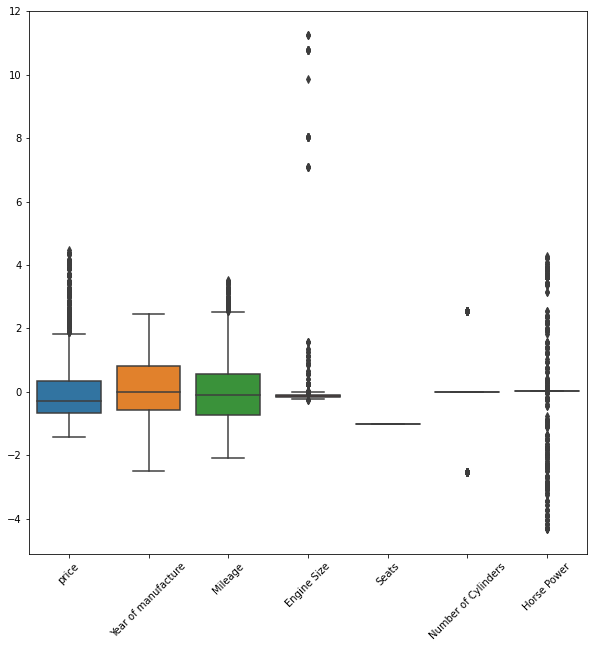

In [36]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

scaled_values = StandardScaler().fit_transform(df.select_dtypes(exclude="object"))

df2=pd.DataFrame(scaled_values,columns=df.select_dtypes(exclude="object").columns)
print(df2.shape)

threshold = 2.3

selected_rows= (df2<threshold).all(axis=1)  & (df2>-threshold).all(axis=1)
selected_index=df[~selected_rows].index
df2.drop(index=selected_index,inplace=True) # for analysis
ndf=df.drop(index=selected_index)  #     for interpretation
ndf.reset_index(inplace = True, drop = True) # to reset the index 
# Create the Scaler object
scaler = StandardScaler()

# Fit data on the scaler object
scaled_values=scaler.fit_transform(df2)
df2 = pd.DataFrame(scaled_values, columns=df.select_dtypes(exclude="object").columns)


import seaborn as sns 
plt.figure(figsize=(10,10))
sns.boxplot(data=df2)
plt.xticks(rotation=45)

count      3722
unique       13
top       Other
freq       1838
Name: Model, dtype: object

count       3722
unique        11
top       Toyota
freq        1598
Name: Brand, dtype: object

count      3722
unique        5
top       LAGOS
freq       2625
Name: Registered city, dtype: object

<Figure size 720x720 with 0 Axes>

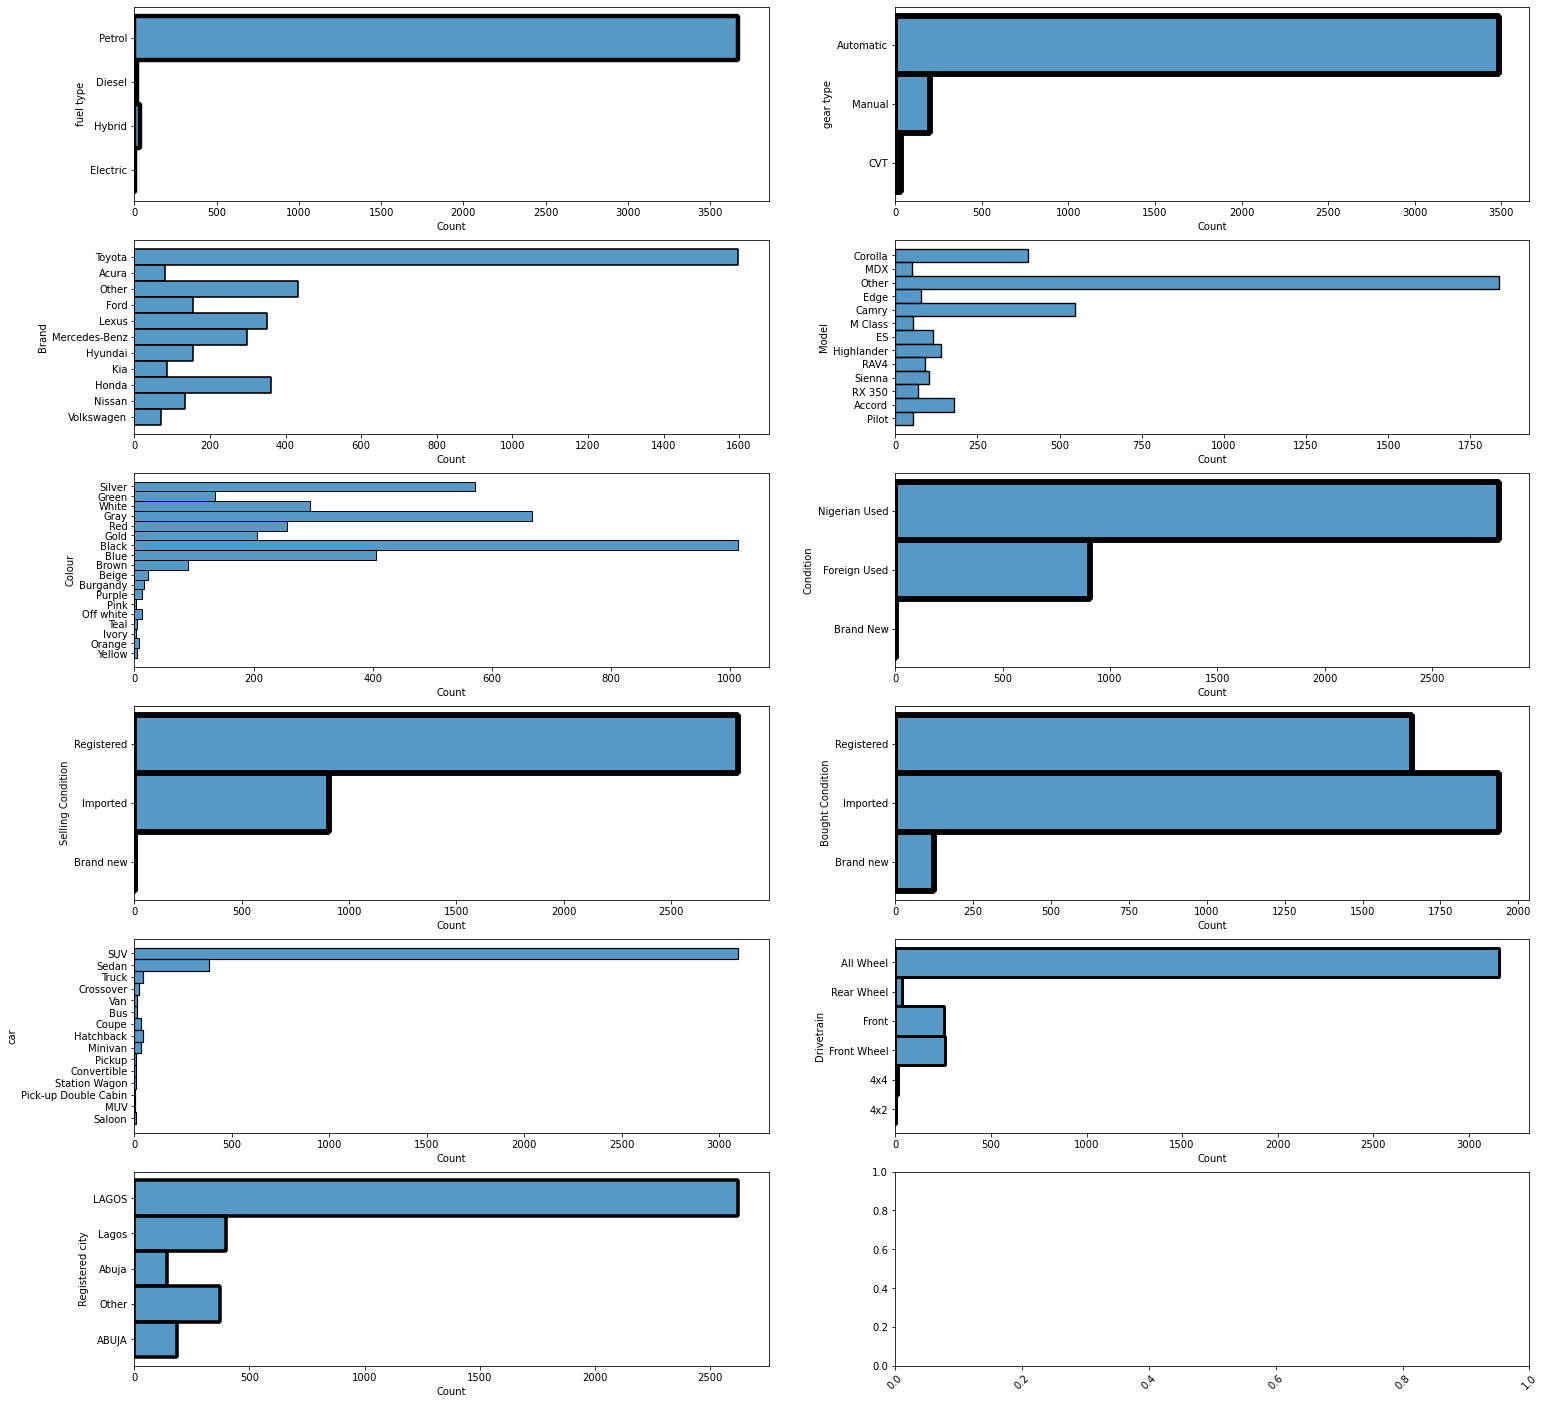

In [37]:
from collections import Counter
def cumulatively_categorise(column,threshold=0.6,return_categories_list=True):
  threshold_value= int(threshold*len(column))
  categories_list=[]

  s=0

  counts=Counter(column)

  for i,j in counts.most_common():

    s+=dict(counts)[i]

    categories_list.append(i)

    if s>=threshold_value:
      break
  categories_list.append('Other')  
  new_column=column.apply(lambda x: x if x in categories_list else 'Other')

  if(return_categories_list):
    return new_column,categories_list

  else:
    return new_column



df["Model"],new_category_list=cumulatively_categorise(df['Model'],return_categories_list=True,threshold=0.5)
df["Brand"],new_category_list2=cumulatively_categorise(df['Brand'],return_categories_list=True,threshold= 0.87)
df["Registered city"],new_category_list2=cumulatively_categorise(df['Registered city'],return_categories_list=True,threshold= 0.87)
display(df["Model"].describe())
display(df["Brand"].describe())
display(df["Registered city"].describe())
plt.figure(figsize=(10,10))
cat_columns = df.select_dtypes(include='object').columns
# Plot for each identified column
nCols=2   # The number of columns that you want
nRows=len(cat_columns)//nCols+1   # The number of correspomding rows 

## to avoid rotating labels:
fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,col in enumerate(cat_columns):
    sns.histplot(y=col,data=df,ax=axes.flatten()[ind])
    plt.xticks(rotation = 45)
plt.show()